# Queries: using the search module

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/simphony/docs/v4.0.0rc3?filepath=docs%2Fusage%2Fsessions%search.ipynb "Click to run this tutorial yourself!")
    
</figure>

The search module enables more advanced queries of session's contents when compared to the methods from the [session object](../../api_reference.md#simphony_osp.session.Session). It is intended to offer a Pythonic approach to querying the session, but still, it has significant efficiency and expresivity limitations. It is also limited by the topology of the graph that the relationships between the individuals form. Therefore, whenever more advanced or more performant queries are required, use [SPARQL](sparql.ipynb).

SimPhoNy's search module is located under `simphony_osp.tools.search` and can be imported as follows.

In [1]:
from simphony_osp.tools import search

The following functions are available in the module

- [find](#find)
- [find_by_identifier](#find_by_identifier)
- [find_by_class](#find_by_class)
- [find_by_attribute](#find_by_attribute)
- [find_relationships](#find_relationships)

A `sparql` function is also provided by the module. However, it is not covered in this section, [but the next one](sparql.ipynb).

To see how they work, let's set-up an example with two cities, Freiburg and Paris.

In [2]:
from simphony_osp.namespaces import city, rdfs
from simphony_osp.session import core_session

# Create a city called "Freiburg"
freiburg = city.City(name="Freiburg", coordinates=[47.997791, 7.842609])
freiburg_neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Altstadt', [47.99525, 7.84726]),
        ('Stühlinger', [47.99888, 7.83774]),
        ('Neuburg', [48.00021, 7.86084]),
        ('Herdern', [48.00779, 7.86268]),
        ('Brühl', [48.01684, 7.843]),
    ]
}
freiburg_citizens = {
    city.Citizen(name='Nikola', age=35),
    city.Citizen(name='Lena', age=70),
}
freiburg[city.hasPart] |= freiburg_neighborhoods
freiburg[city.hasInhabitant] |= freiburg_citizens

# Create a city called "Paris"
paris = city.City(name="Paris", coordinates=[48.85333, 2.34885])
paris_neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ('Louvre', [48.86466, 2.33487]),
        ('Bourse', [48.86864, 2.34146]),
        ('Temple', [48.86101, 2.36037]),
        ('Hôtel-de-Ville', [48.85447, 2.35902]),
        ('Panthéon', [48.84466, 2.3471]),
    ]
}
paris_citizens = {
    city.Citizen(name='François', age=32)
}
paris[city.hasPart] |= paris_neighborhoods
paris[city.hasInhabitant] = paris_citizens

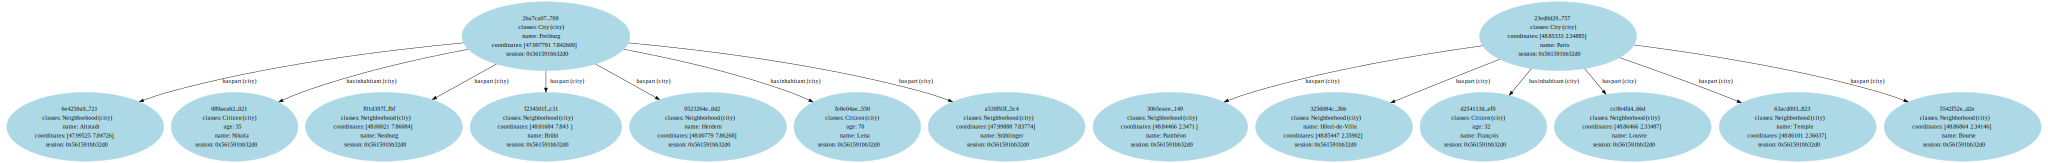

In [3]:
from simphony_osp.tools import semantic2dot  # explained in a later section

semantic2dot(freiburg, *freiburg_neighborhoods, *freiburg_citizens,
             paris, *paris_neighborhoods, *paris_citizens)

<div class="admonition important">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Tip</div></div>
    
On most web browsers (including mobile ones), you can right-click the picture above and then click "open in new tab" to see the picture in its full size.
    
</div>

The most important detail to keep in mind while reading this page is that the collection of functions covered do not act on a session object, but on an ontology individual object that has to be provided beforehand. They perform the search by **traversing the relationships in the graph starting from the given object**.
        
This is the precisely the reason why a directed graph with two [weakly connected components](https://en.wikipedia.org/wiki/Connectivity_(graph_theory)) is provided as an example: it illustrates that it is impossible to find individuals from one of the components if the search function is called on an individual belonging to another component. Head to the first subsection, dealing with the function [find](#find), for an example of this behavior.

## `find`

## `find_by_identifier`

## `find_by_class`

## `find_by_attribute`

## `find_relationships`